<h1 style="text-align:center;">Лабораторная работа №3</h1>

<h2 style="text-align:center;">Решение системы нелинейных алгебраических уравнений различными методами</h2>

<h3 style="text-align:center;">Тулупов Николай Дмитриевич</h3>
<h3 style="text-align:center;">Б01-204</h3>


Цель: решить выбранные НЛУ и НЛАУ перечисленными методами: 
1. метод простой итерации 
2. метод Ньютона

In [197]:
import numpy as np
import time
import matplotlib.pyplot as plt

__<h3 style="text-align:center;">Решение нелинейных алгебраических уравнений</h3>__

**1) Метод простой итерации для НАУ.**

<img src="images/task_lab_3_1.png" alt="drawing" width="600"/>

вариант м
/

In [198]:
#FPI - fixed point iteration
def FPI(f, x0, eps, max_iter):
    x = x0
    iter = 0

    while 1:
        fx = f(x) 
        if isinstance(fx, (int, float)):
            if abs(x - fx) < eps:
                return x, iter
            x = fx
        else:
            print(fx)
            return x, iter
        
        
        
        iter += 1
        if iter >= max_iter:
            print("Превышено максимально допустимое количество итераций")
            break
        

Изучим скорость сходимости метода для начальных приближений, равных 2^n, где n - целые числа

In [209]:
start_time = time.time()
#вариант м
def f(x):
    return 1/np.sqrt(x+1)

x0_1 = []
iters_1 = []
eps = 1.00000e-10
for i in range(-2, 10, 1):
    x0 = 2 ** i
    x0_1.append(x0)
    msa = FPI(f, x0, eps, 10000)
    x, iterations = msa
    iters_1.append(iterations)
    print(x0, x, iterations)


time_msa = 1000*(time.time() - start_time)
print("Время выполнения = {0:.4f} мс".format(time_msa))

0.25 0.7548776663070152 15
0.5 0.7548776662740349 15
1 0.7548776662246666 15
2 0.7548776662651681 16
4 0.7548776662804131 16
8 0.7548776662951936 16
16 0.7548776663081205 16
32 0.7548776663186453 16
64 0.7548776663268173 16
128 0.7548776662281365 17
256 0.7548776662271606 17
512 0.7548776662264503 17
Время выполнения = 3.4952 мс


In [210]:
start_time = time.time()
#вариант м
def f(x):
    try:
        if x == 0:
            raise ZeroDivisionError("Ошибка: деление на ноль!")
        return 1 / (x ** 2) - 1
    except ZeroDivisionError as e:
        return str(e)


x0_2 = []
iters_2 = []
eps = 1.00000e-10
for i in range(-2, 10, 1):
    x0 = 2 ** i
    x0_2.append(x0)
    msa = FPI(f, x0, eps, 10000)
    x, iterations = msa
    iters_2.append(iterations)
    print(x0, x, iterations)

time_msa = 1000*(time.time() - start_time)
print("Время выполнения = {0:.4f} мс".format(time_msa))

Ошибка: деление на ноль!
0.25 0.0 9
Ошибка: деление на ноль!
0.5 0.0 12
Ошибка: деление на ноль!
1 0.0 1
Ошибка: деление на ноль!
2 0.0 17
Ошибка: деление на ноль!
4 0.0 11
Ошибка: деление на ноль!
8 0.0 8
Ошибка: деление на ноль!
16 0.0 8
Ошибка: деление на ноль!
32 0.0 8
Ошибка: деление на ноль!
64 0.0 8
Ошибка: деление на ноль!
128 0.0 8
Ошибка: деление на ноль!
256 0.0 5
Ошибка: деление на ноль!
512 0.0 5
Время выполнения = 1.1432 мс


Видим, что некоторый выбор функции может быть неудачным - мы выйдем за границы области определения функции

**2) Метод Ньютона для НАУ.**

In [260]:
def newton(f, df, x0, eps, max_iter = 1000):
    x = x0
    for i in range(max_iter):
        try:
            x_next = x - f(x) / df(x)
            if abs(x_next - x) < eps:
                print(f"Решение найдено за {i+1} итераций.")
                return x_next, i
            x = x_next
        except ZeroDivisionError:
            print("Ошибка: деление на ноль!")
            return None
        except ValueError as e:
            print(f"Ошибка: {e}")
            return None
    print("Достигнуто максимальное количество итераций.")
    return x, i

In [269]:
def f(x):
    if x + 1 < 0:  # Проверяем, чтобы подкоренное выражение было положительным
        raise ValueError("Недопустимое значение: x + 1 должно быть >= 0")
    return np.sqrt(x + 1) - 1 / x

def df(x):
    if x + 1 < 0: # Проверяем, чтобы подкоренное выражение было положительным
        raise ValueError("Недопустимое значение: x + 1 должно быть >= 0")
    return 1 / (2 * np.sqrt(x + 1)) + 1 / (x ** 2)

x0_newt = []
iter_newt = []
x0 = 0.1
while x0 < 1:
    # Начальное приближени
    x, iter = newton(f, df, x0, eps)
    if x is not None:
        print(f" При x0 = {x0:.2f} найденное решение: {x:.5f}")

    x0_newt.append(x0)
    iter_newt.append(iter)
    x0 += 0.05

print(x0_newt, iter_newt)



Решение найдено за 8 итераций.
 При x0 = 0.10 найденное решение: 0.75488
Решение найдено за 7 итераций.
 При x0 = 0.15 найденное решение: 0.75488
Решение найдено за 7 итераций.
 При x0 = 0.20 найденное решение: 0.75488
Решение найдено за 6 итераций.
 При x0 = 0.25 найденное решение: 0.75488
Решение найдено за 6 итераций.
 При x0 = 0.30 найденное решение: 0.75488
Решение найдено за 6 итераций.
 При x0 = 0.35 найденное решение: 0.75488
Решение найдено за 6 итераций.
 При x0 = 0.40 найденное решение: 0.75488
Решение найдено за 5 итераций.
 При x0 = 0.45 найденное решение: 0.75488
Решение найдено за 5 итераций.
 При x0 = 0.50 найденное решение: 0.75488
Решение найдено за 5 итераций.
 При x0 = 0.55 найденное решение: 0.75488
Решение найдено за 4 итераций.
 При x0 = 0.60 найденное решение: 0.75488
Решение найдено за 4 итераций.
 При x0 = 0.65 найденное решение: 0.75488
Решение найдено за 4 итераций.
 При x0 = 0.70 найденное решение: 0.75488
Решение найдено за 3 итераций.
 При x0 = 0.75 найде

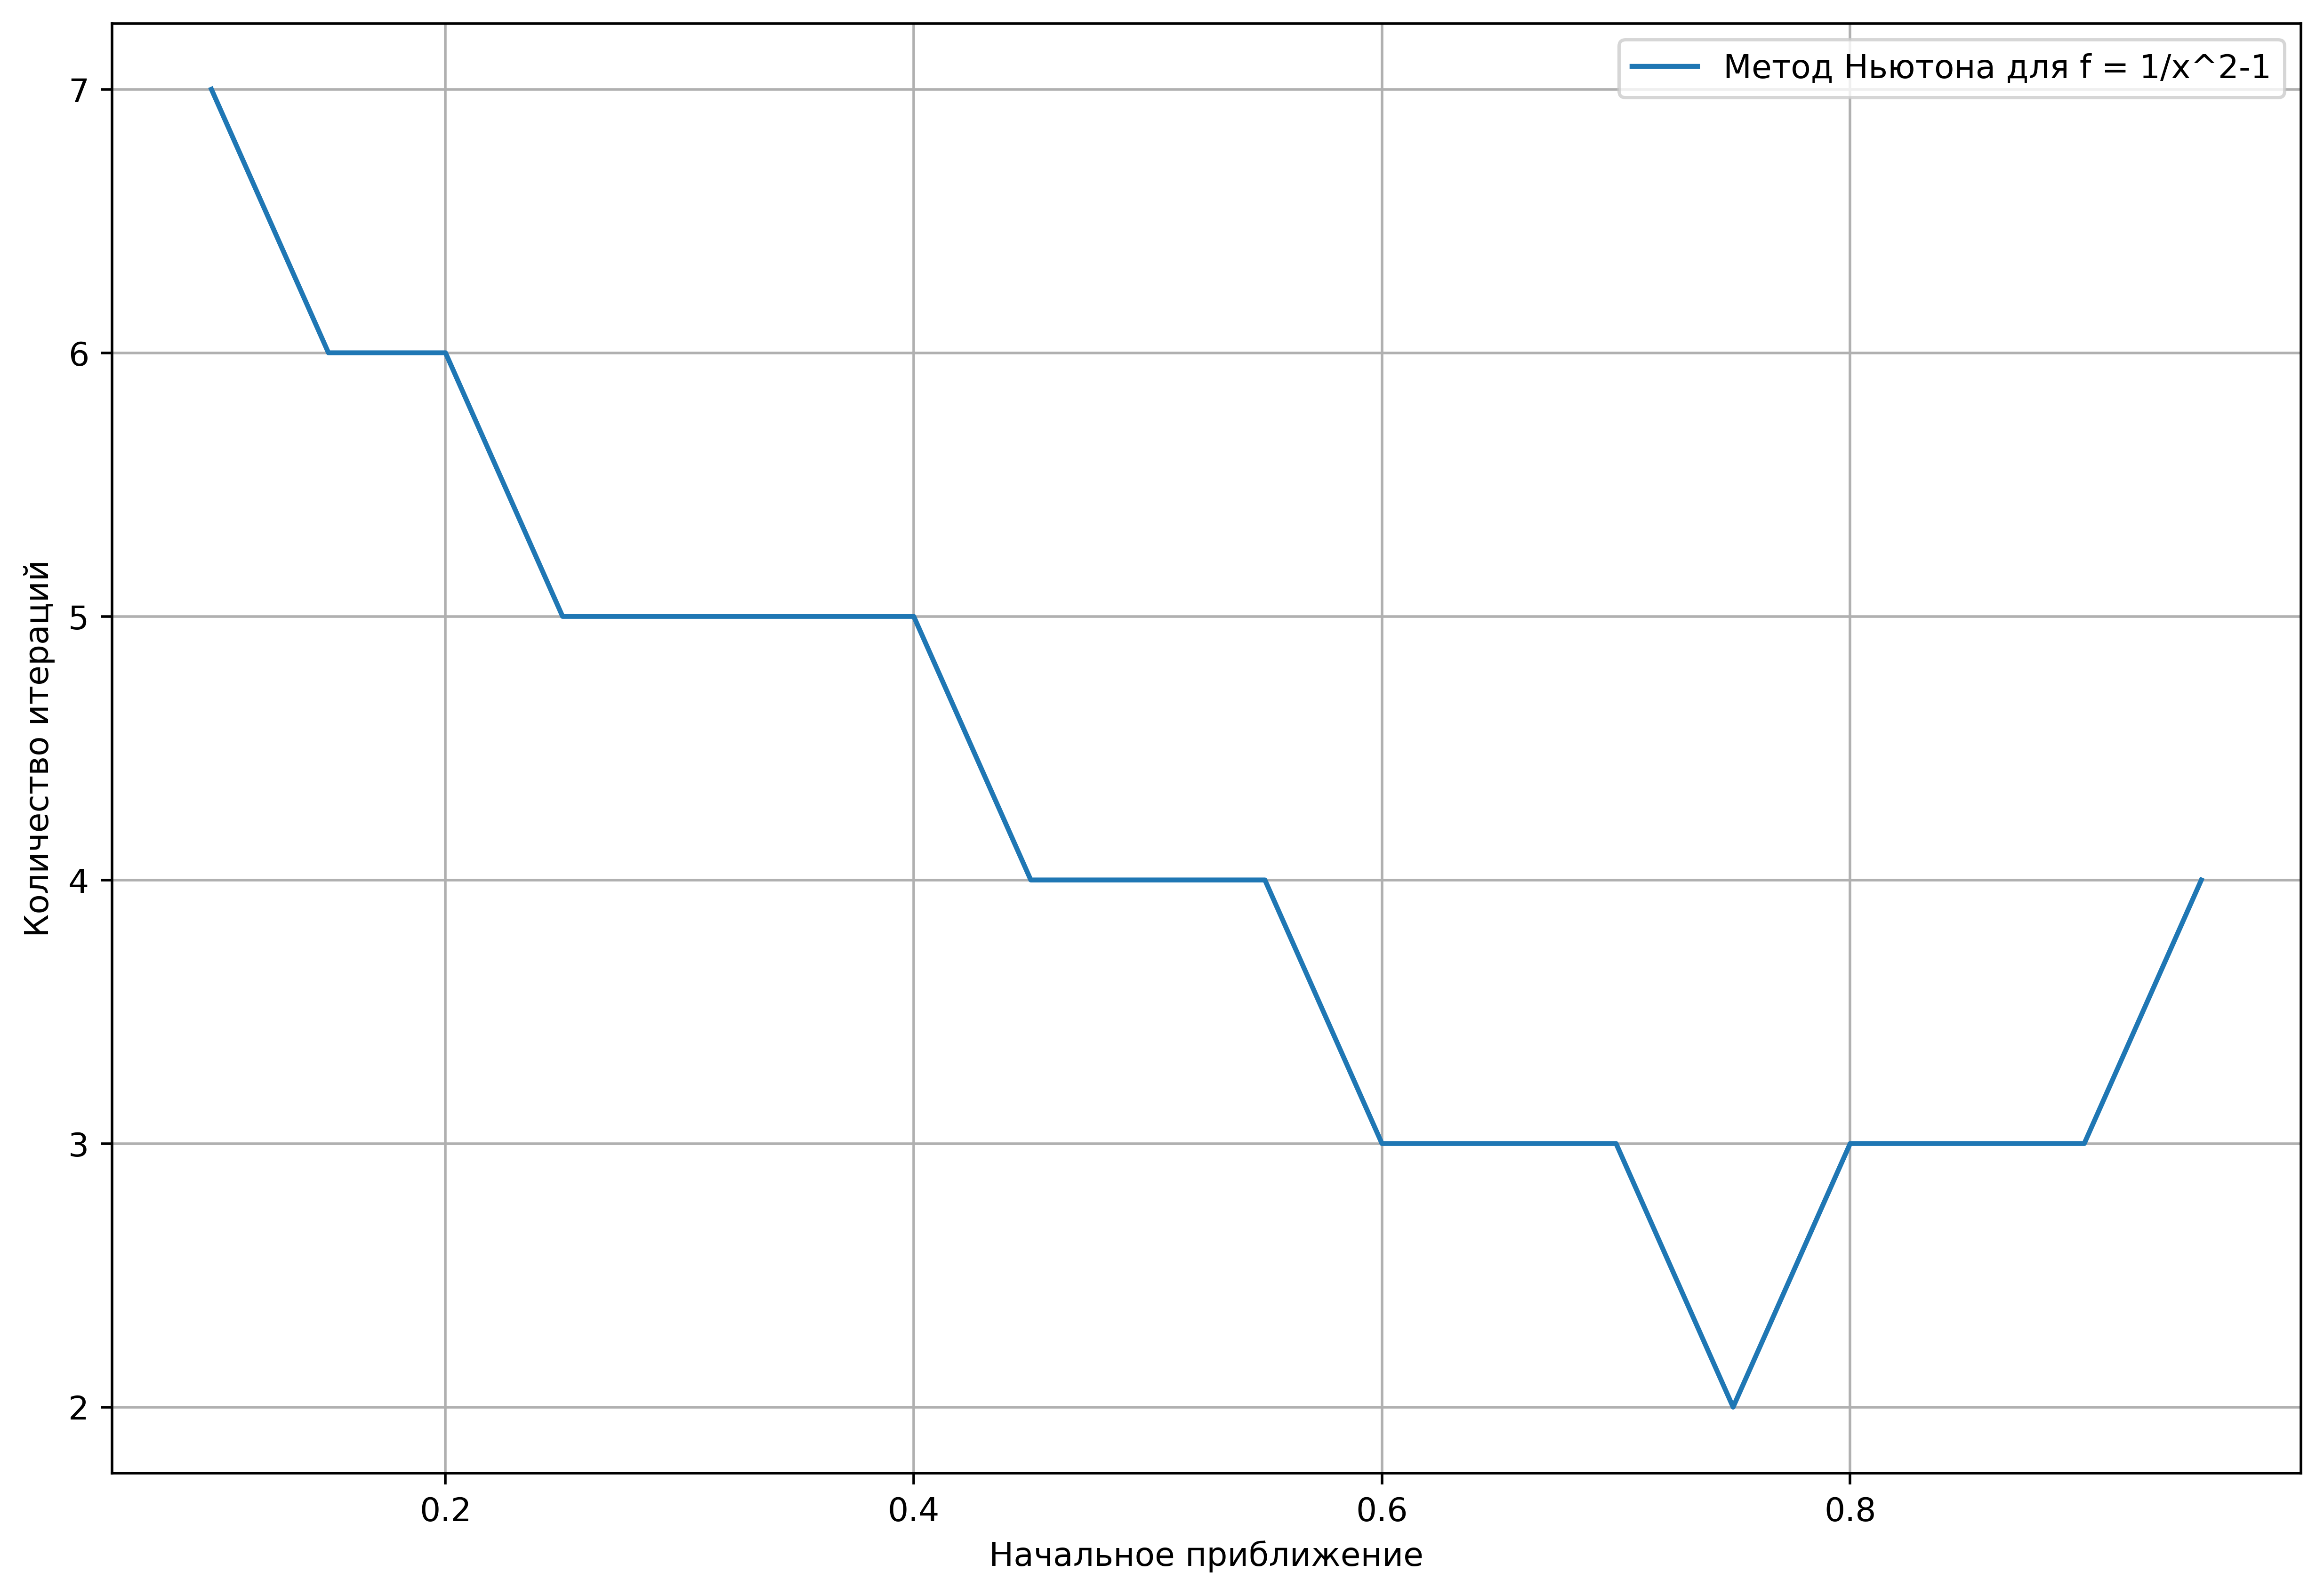

In [270]:
plt.figure(figsize = [12,8], dpi = 500)

plt.plot(x0_newt, iter_newt, label = "Метод Ньютона для f = 1/x^2-1")

plt.xlabel('Начальное приближение')
plt.ylabel('Количество итераций')


plt.legend()
plt.grid()
plt.show()


__<h3 style="text-align:center;">Решение систем нелинейных алгебраических уравнений</h3>__

**1) Метод простой итерации для СНАУ.**

<img src="images/task_lab_3_2.png" alt="drawing" width="600"/>

выберем вариант б)


In [201]:
def FPI_(fx, fy, x0, y0, eps, max_iter):
    x = x0
    y = y0
    iter = 0

    while 1:
        f_x = fx(x, y)
        f_y = fy(x) 
        if isinstance(f_x, (int, float)) and isinstance(f_y, (int, float)):
            if (abs(x - f_x) < eps) and (abs(y - f_y) < eps):
                return x, y, iter
            x = f_x
            y = f_y
        else:
            print("Возникла ошибка", f_x, f_y)
            return x, y, iter
              
        iter += 1
        if iter >= max_iter:
            print("Превышено максимально допустимое количество итераций")
            break

    return x, y, iter
    

In [204]:
# система б
def fx(x, y):
    return np.sqrt(np.tan(x*y + 0.4))

def fy(x):
    s = (1-0.6*x**2)/2
    if s < 0:
        return "(1-0.6*x**2)/2 < 0"
    else:
        return np.sqrt(s)

Задаем начальные приближения недалеко от корня, который можем примерно определить, построив графики функций (см рисунок).
Если начальное приближение будет далеко от корня, можем попасть в область, где функция неопределена.

<img src="images/lab2_graph.png" alt="drawing" width="1000"/>


In [203]:
(FPI_(fx, fy, 1, 0.4, eps, 1000))

(np.float64(1.0484001411328012), np.float64(0.4126222767849122), 233)

**2) Метод Ньютона для СНАУ.**